
# Práctica 1: Redes neuronales en Keras (CORREGIDA)


* Esta práctica nos servirá para saber cómo se crea un modelo en Keras aplicando de una tirada todos los pasos a otro conjunto de datos. 
* Usaremos el conjunto de datos Fashion-MNIST —también precargado en Keras y muy parecido a los que hicimos en clase en cuanto a la preparación requerida de los datos— para poder centrarnos en los pasos relacionados con el modelo.
* Sabemos que Fashion-MNIST100 es un conjunto de 70K imágenes en escala de grises en 10 categorías. 
* Las imágenes tienen dimensiones (28 x 28) píxeles con valores de 0 a 255 (escala de grises) y usaremos 60K imágenes para entrenar la red y 10K imágenes para evaluar la precisión con la que la red aprende a clasificarlas.

## Preparar los datos de Fashion-MNIST

In [11]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)


2.7.0


In [12]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

* La carga del conjunto de datos devuelve cuatro matrices NumPy. 
* Las matrices `train_images` y `train_labels` son el conjunto de entrenamiento. 
* Las matrices `test_images` y `test_labels` son el conjunto de prueba para evaluar la precisión del modelo. 
* Las etiquetas son una matriz de enteros, que van de `0` a `9`. Estos corresponden a la clase de ropa que representa la imagen:

Dado que los nombres de clase no se incluyen con el conjunto de datos, podemos crear una lista con ellos para usarlos más adelante al visualizar las imágenes:

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

**Escalamos** los **valores de entrada** en el rango `0-1`:

In [ ]:
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

train_images = train_images / 255.0
test_images = test_images / 255.0


Recordemos que es una buena práctica **comprobar** que los **datos tienen la forma que esperamos**:

In [ ]:
print("train_images.shape:",train_images.shape)
print("len(train_labels:",len(train_labels))
print("test_images.shape:",test_images.shape)
print("len(test_labels):",len(test_labels))

train_images.shape: (60000, 28, 28)
len(train_labels: 60000
test_images.shape: (10000, 28, 28)
len(test_labels): 10000


Y que las muestras y etiquetas son los valores que esperamos:

In [ ]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

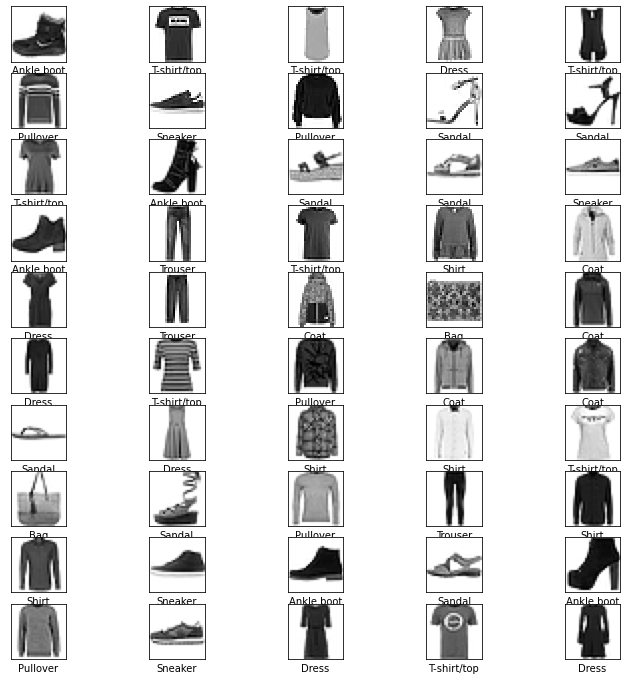

In [ ]:
plt.figure(figsize=(12,12))
for i in range(50):
    plt.subplot(10,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Definición de los modelos

* Dado que los datos son de la misma dimensión y forma, podríamos usar el mismo modelo que en el ejemplo de reconocimiento de números que vimos en clase, pero antes recordemos que en el modelo anterior hemos preprocesado los datos de entrada con la función `numpy.reshape()`. 
* En realidad, Keras nos facilita este paso de reconvertir las muestras de entrada de 28 × 28 a un vector (array) de 784 números (concatenando fila a fila) con el uso de la 
capa `keras.layers.Flatten()`, como se os pedía en la práctica:

Para facilitar la definición de las diferentes arquitecturas neuronales en cada uno de los 8 casos que me plantea la práctica, me creo vectores con los valores que debo ir utilizando:

In [ ]:
casos = 8
numero_neuronas_primera_capa = [10,10,10,10,512,512,512,512]
funcion_activacion_primera_capa = ['relu','relu','sigmoid','sigmoid','relu','relu','sigmoid','sigmoid']
optimizador =['sgd','rmsprop','sgd','rmsprop','sgd','rmsprop','sgd','rmsprop']
funcion_perdida = ['sparse_categorical_crossentropy', 'sparse_categorical_crossentropy','sparse_categorical_crossentropy',\
                   'sparse_categorical_crossentropy','sparse_categorical_crossentropy','sparse_categorical_crossentropy',\
                   'sparse_categorical_crossentropy','sparse_categorical_crossentropy']
numero_iteraciones = [5,5,5,5,5,5,5,5]
metrica = ['accuracy','accuracy','accuracy','accuracy','accuracy','accuracy','accuracy','accuracy']
models = []

Decido crearme un vector de modelos de neuronas, uno para cada caso

In [ ]:

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

for caso in range(casos):
  model = Sequential()
  model.add(Flatten(input_shape=(28, 28)))
  model.add(Dense(numero_neuronas_primera_capa[caso], activation=funcion_activacion_primera_capa[caso]))
  model.add(Dense(10, activation='softmax'))
  models.append(model)


* Podemos comprobar con el método `summary()` que esta capa no requiere parámetros para aplicar la transformación (columna Param #). 
* En general, siempre usaremos esta capa del modelo para hacer esta operación en lugar de redimensionar el tensor de datos antes de la entrada

In [ ]:
for caso in range(casos):
  print("CASO ",caso + 1)
  print("---------------------------------")
  models[caso].summary()
  print("\n\n")

CASO  1
---------------------------------
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 10)                7850      
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________



CASO  2
---------------------------------
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
           

## Configuración de los modelos

Antes de que el modelo esté listo para ser entrenado, se requiere especificar el valor de algunos argumentos del método de compilación:

In [ ]:
for caso in range(casos):
  models[caso].compile(optimizer=optimizador[caso], loss=funcion_perdida[caso], metrics=[metrica[caso]])

* Recordemos que en este paso se especifica la **función de coste** (**loss**) que "dirige" el entrenamiento del modelo en la dirección correcta durante el proceso de entrenamiento. 
* También especificamos el **tipo de optimización** que usaremos **para actualizar los parámetros del modelo** durante el proceso de aprendizaje.
* Finalmente, se indica la **métrica** que se usará para monitorizar los pasos de entrenamiento y prueba. 
* En este caso  proponemos usar la **precisión** (**accuracy**), es decir, la **fracción** de las **imágenes** que están **clasificadas correctamente**.

## Entrenamiento de los modelos

Ahora los modelos ya están listos para entrenar mediante el método `fit()`, actualizando los parámetros de tal manera que aprenda a asociar imágenes a etiquetas:

In [ ]:
for caso in range(casos):
  print("CASO ",caso + 1)
  print("---------------------------------")
  print("NÚMERO NEURONAS PRIMERA CAPA: ",numero_neuronas_primera_capa[caso])
  print("FUNCIÓN ACTIVACIÓN PRIMERA CAPA: ",funcion_activacion_primera_capa[caso])
  print("FUNCIÓN ACTIVACIÓN ULTIMA CAPA: softmax")
  print("OPTIMIZADOR: ",optimizador[caso])
  print("FUNCIÓN PÉRDIDA: ",funcion_perdida[caso])
  print("MÉTRICA: ",metrica[caso])
  print("---------------------------------")
  models[caso].fit(train_images, train_labels, epochs=numero_iteraciones[caso])
  print("\n\n")

CASO  1
---------------------------------
NÚMERO NEURONAS PRIMERA CAPA:  10
FUNCIÓN ACTIVACIÓN PRIMERA CAPA:  relu
FUNCIÓN ACTIVACIÓN ULTIMA CAPA: softmax
OPTIMIZADOR:  sgd
FUNCIÓN PÉRDIDA:  sparse_categorical_crossentropy
MÉTRICA:  accuracy
---------------------------------
Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8733 - accuracy: 0.7159
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5665 - accuracy: 0.8041
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5119 - accuracy: 0.8220
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4828 - accuracy: 0.8304
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4649 - accuracy: 0.8365



CASO  2
---------------------------------
NÚMERO NEURONAS PRIMERA CAPA:  10
FUNCIÓN ACTIVACIÓN PRIMERA CAPA:  relu
FUNCIÓN ACTIVACIÓN ULTIMA CAPA: softmax
OPTIMIZADOR:  rmsprop
FUNCIÓN PÉRDIDA:  sparse_categorical_cr

* Vemos claramente que, **para los datos de entrenamiento**, el **modelo que mejores valores nos da es el del caso 8**, con la **menor pérdida** y la **mayor precisión**, en torno al 90%. Es lógico que sea uno de los casos con 512 neuronas porque está aprendiendo muchas mas carácterísticas de los datos de entrenamiento que los modelos con 10. Otra cosa serán los valores de pérdida y precisión con datos nuevos, que serán muy altos por **overfitting**. 
* Parece que la combinación de función activación `sigmoid` en la primera capa con optimizador `rmsprop` va bastante bien.
* El que peor se comporta es el caso 3 con unas pérdidas más altas y una preción de solo el 75%. Parece que la combinación función activación `sigmoid` con optimizador `sgd` no va muy bien. De hecho se ve también con las 512 neuronas con esa misma combinación en el caso 7, que da los valores más bajos de precisión

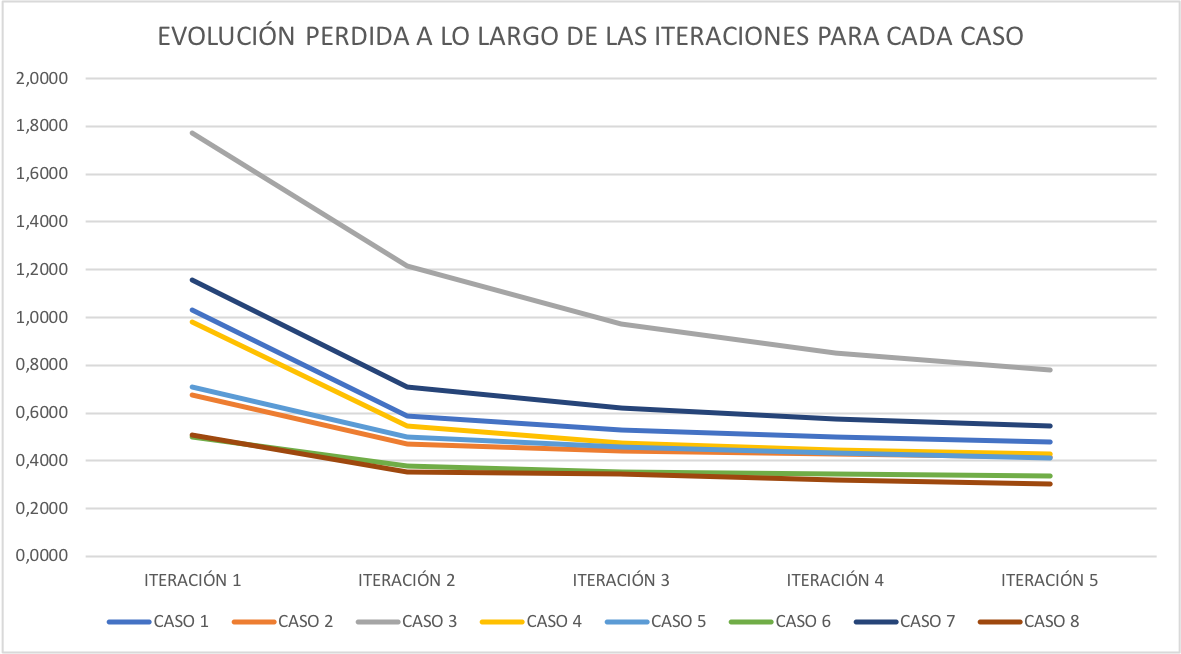

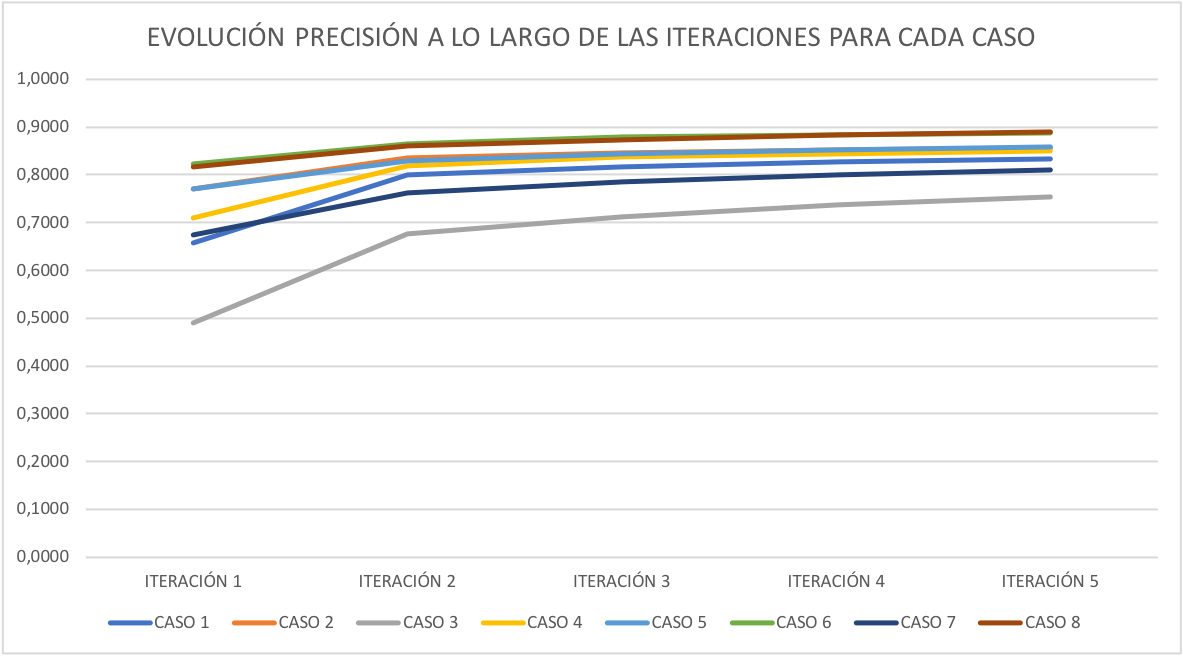

## Evaluación y mejora de los modelos

El siguiente paso es comparar el modelo con el conjunto de datos de datos de prueba:

In [ ]:
test_loss = []
test_acc = []
for caso in range(casos):
  test_loss.append(models[caso].evaluate(test_images,  test_labels)[0])
  test_acc.append(models[caso].evaluate(test_images,  test_labels)[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.3537 - accuracy: 0.8768


In [ ]:
for caso in range(casos):
  print("CASO ",caso + 1)
  print("---------------------------------")
  print("PERDIDA CON LOS DATOS DE TEST: ",test_loss[caso])
  print("PRECISIÓN CON LOS DATOS DE TEST: ",test_acc[caso])
  print("\n\n")

CASO  1
---------------------------------
PERDIDA CON LOS DATOS DE TEST:  0.49229565262794495
PRECISIÓN CON LOS DATOS DE TEST:  0.8267999887466431



CASO  2
---------------------------------
PERDIDA CON LOS DATOS DE TEST:  0.4611721336841583
PRECISIÓN CON LOS DATOS DE TEST:  0.8396999835968018



CASO  3
---------------------------------
PERDIDA CON LOS DATOS DE TEST:  0.7661177515983582
PRECISIÓN CON LOS DATOS DE TEST:  0.7554000020027161



CASO  4
---------------------------------
PERDIDA CON LOS DATOS DE TEST:  0.4725416898727417
PRECISIÓN CON LOS DATOS DE TEST:  0.8320000171661377



CASO  5
---------------------------------
PERDIDA CON LOS DATOS DE TEST:  0.44797149300575256
PRECISIÓN CON LOS DATOS DE TEST:  0.838699996471405



CASO  6
---------------------------------
PERDIDA CON LOS DATOS DE TEST:  0.43048295378685
PRECISIÓN CON LOS DATOS DE TEST:  0.8672999739646912



CASO  7
---------------------------------
PERDIDA CON LOS DATOS DE TEST:  0.5560112595558167
PRECISIÓN CON 

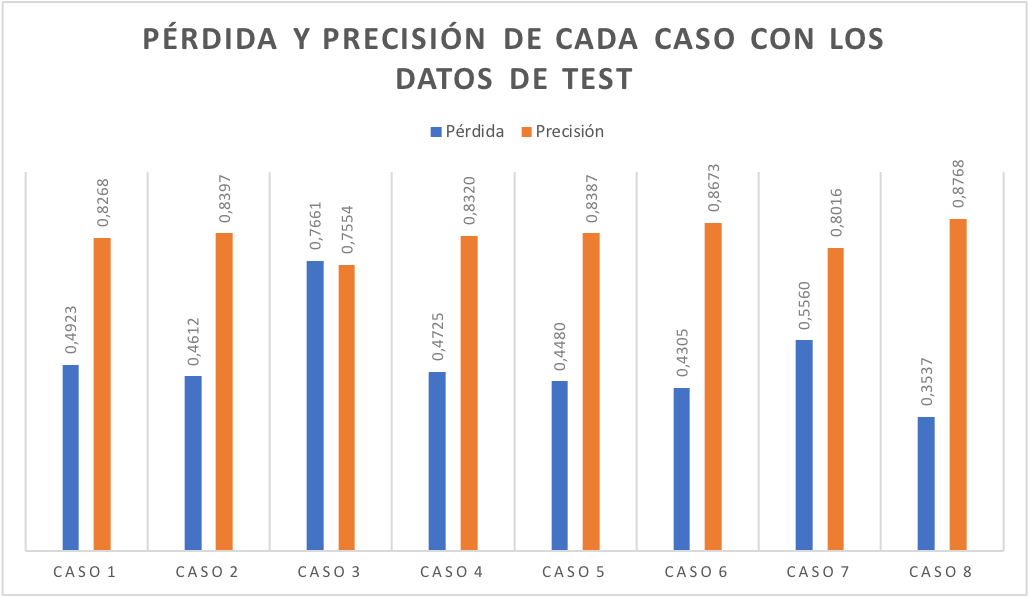

Se vuelve a ver que, con los datos de Test, el **caso que mejor se comporta es el caso 8** (con las pérdidas mas bajas y las precisiones mas altas) y el de **peor comportamiento es el del caso 3, de nuevo**. Se ve que no ha habido excesivo sobreentrenamiendo debido al alto número de neuronas en la primera capa. Eso nos hace pensar que el número de neuronas en la primera capa afecta al overfiting menos que, por ejemplo, meter mas capas. (El caso 8 solo ha tenido un poco mas de pérdida con los datos de test, frente a los de entrenamiento y un poco menos de precisión (3pp) con los datos de test frente a los de entrenamiento)

## Uso de los modelos para hacer predicciones

Con el modelo entrenado, podemos empezar a usarlo para hacer predicciones sobre algunas imágenes (usemos por comodidad alguna de las imágenes de prueba que ya tenemos cargadas en el notebook). Lo haremos, como pide el enunciado, con la sexta imagen (la que tiene índice 5 en el array)

In [ ]:
predictions = []
for caso in range(casos):
  predictions.append(models[caso].predict(test_images))

En `predictions` se ha almacenado la predicción de la etiqueta para cada imagen del conjunto de prueba

In [ ]:
for caso in range(casos):
  print("----------------------------------------------------------")
  print("PREDICCIONES CASO ", caso + 1 , " : ", predictions[caso][5])
  print("VALOR MÁXIMO: ", np.argmax(predictions[caso][5]))
  print("\n\n")

----------------------------------------------------------
PREDICCIONES CASO  1  :  [9.7654370e-04 9.8503160e-01 3.3598351e-03 1.1568620e-03 9.4505372e-03
 1.5294805e-12 2.4228284e-05 1.1014587e-08 3.3549310e-07 2.0940751e-09]
VALOR MÁXIMO:  1



----------------------------------------------------------
PREDICCIONES CASO  2  :  [2.75113210e-02 9.46713328e-01 4.66493017e-04 1.67831569e-03
 2.33742297e-02 1.12517886e-11 2.53429957e-04 1.30137914e-12
 2.89854779e-06 2.07186468e-13]
VALOR MÁXIMO:  1



----------------------------------------------------------
PREDICCIONES CASO  3  :  [1.8403722e-02 8.7536263e-01 1.0470715e-02 4.4626296e-02 2.0296549e-02
 1.0678427e-02 1.7604508e-02 9.1579609e-04 8.1686000e-04 8.2444446e-04]
VALOR MÁXIMO:  1



----------------------------------------------------------
PREDICCIONES CASO  4  :  [4.8217317e-03 9.8853230e-01 9.0851128e-04 4.1008429e-03 4.1051509e-04
 5.1524785e-05 1.1652216e-03 5.1365400e-06 3.0925751e-06 1.1305261e-06]
VALOR MÁXIMO:  1



-

El modelo está más seguro que esta imagen son unos pantalones (trousers) que otra cosa. Vemos la etiqueta de clasificación

In [ ]:
test_labels[5]

1

Aprovechemos que este conjunto de datos es más rico visualmente para presentar gráficamente cómo de bien o de mal se comporta el modelo. Para ello, usaremos esta función extraída del tutorial de TensorFlow

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)    

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#00FF00")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('black')

Las etiquetas de predicción correcta las pintaremos de negro y las etiquetas de predicción incorrecta las colorearemos de rojo.El número da el porcentaje (de 100) para la etiqueta predicha.

----------------------------------------------------------
PREDICCIONES CASO  1  FIGURA  5


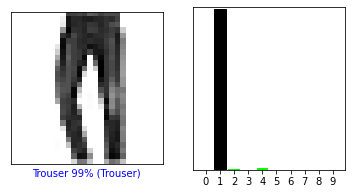




----------------------------------------------------------
PREDICCIONES CASO  2  FIGURA  5


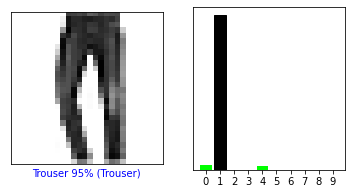




----------------------------------------------------------
PREDICCIONES CASO  3  FIGURA  5


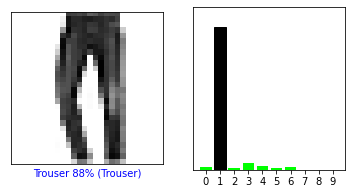




----------------------------------------------------------
PREDICCIONES CASO  4  FIGURA  5


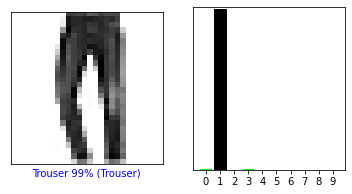




----------------------------------------------------------
PREDICCIONES CASO  5  FIGURA  5


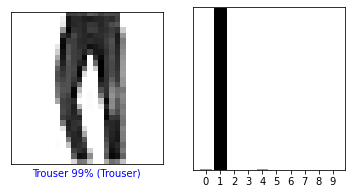




----------------------------------------------------------
PREDICCIONES CASO  6  FIGURA  5


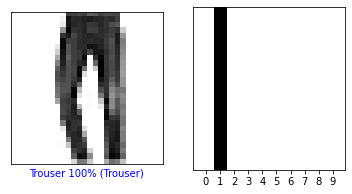




----------------------------------------------------------
PREDICCIONES CASO  7  FIGURA  5


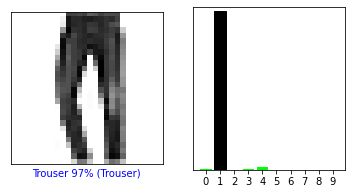




----------------------------------------------------------
PREDICCIONES CASO  8  FIGURA  5


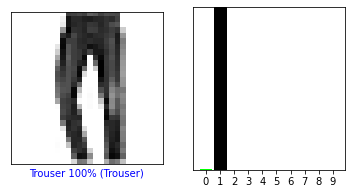

In [ ]:
def prediccion_un_caso(caso_concreto):
  for caso in range(casos):
    print("----------------------------------------------------------")
    print("PREDICCIONES CASO ", caso + 1 , " FIGURA ", caso_concreto)
    plt.figure(figsize=(6,3))
    plt.subplot(1,2,1)
    plot_image(caso_concreto, predictions[caso][caso_concreto], test_labels, test_images)
    plt.subplot(1,2,2)
    plot_value_array(caso_concreto, predictions[caso][caso_concreto],  test_labels)
    plt.show()
    print("\n\n")

prediccion_un_caso(5)

Vemos claramente como, para el caso del objeto 6, con cada uno de los 8 casos identifica que son unos pantalones con una precisión diferente, siendo el octabo caso el de mayor precisión

----------------------------------------------------------
PREDICCIONES CASO  1  FIGURA  8


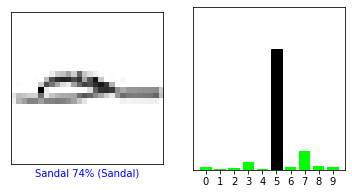




----------------------------------------------------------
PREDICCIONES CASO  2  FIGURA  8


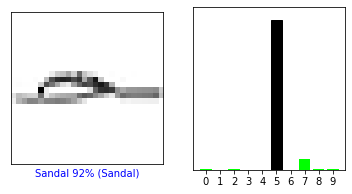




----------------------------------------------------------
PREDICCIONES CASO  3  FIGURA  8


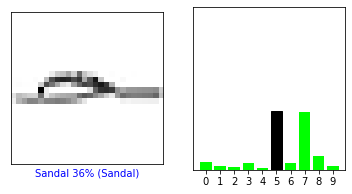




----------------------------------------------------------
PREDICCIONES CASO  4  FIGURA  8


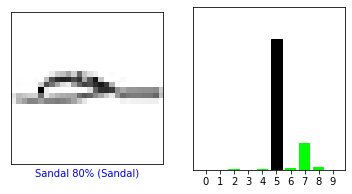




----------------------------------------------------------
PREDICCIONES CASO  5  FIGURA  8


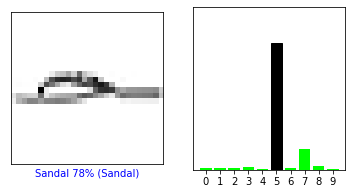




----------------------------------------------------------
PREDICCIONES CASO  6  FIGURA  8


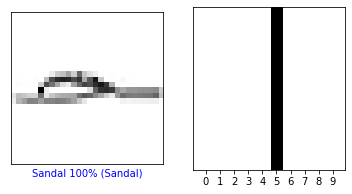




----------------------------------------------------------
PREDICCIONES CASO  7  FIGURA  8


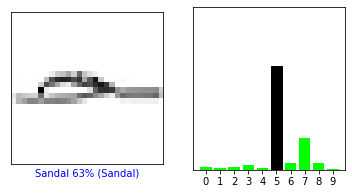




----------------------------------------------------------
PREDICCIONES CASO  8  FIGURA  8


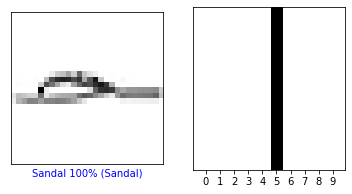

In [ ]:
prediccion_un_caso(8)

Vemos para la figura 8 (una sandalia) y el caso 3, realmente no está seguro de que objeto se trata, cuando en el caso 8, está totalmente seguro

Visualicemos varias imágenes con sus predicciones para los 8 casos. Se debe tener en cuenta que el modelo puede estar equivocado, incluso cuando tiene mucha confianza en la clasificación sobre una de las clases.

----------------------------------------------------------
PREDICCIONES CASO  1  FIGURAS  7  x  2


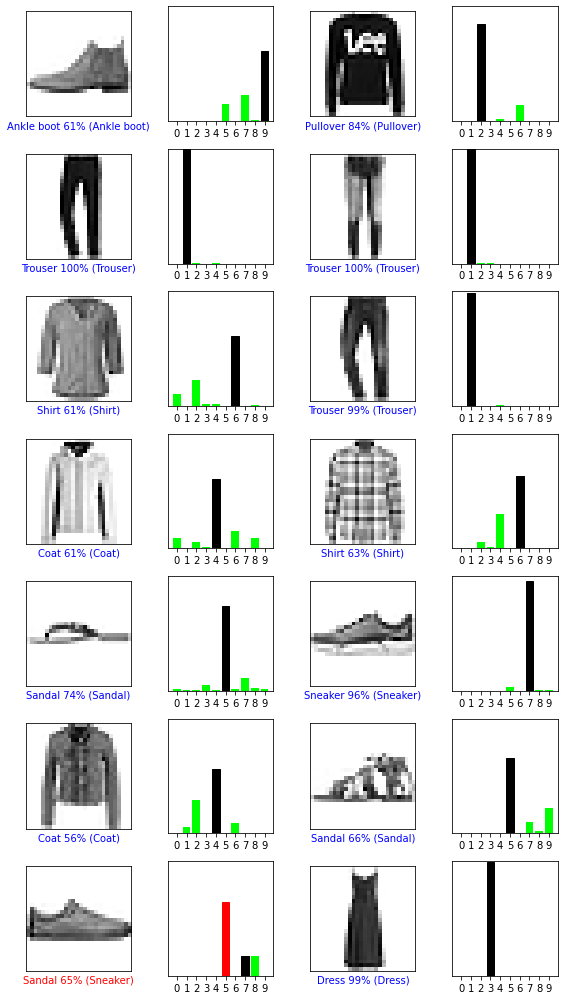




----------------------------------------------------------
PREDICCIONES CASO  2  FIGURAS  7  x  2


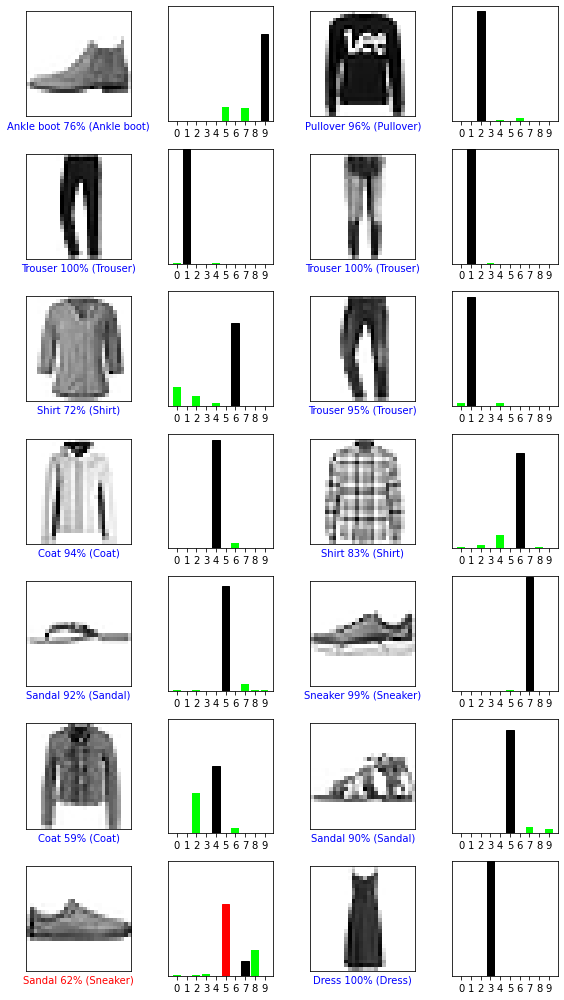




----------------------------------------------------------
PREDICCIONES CASO  3  FIGURAS  7  x  2


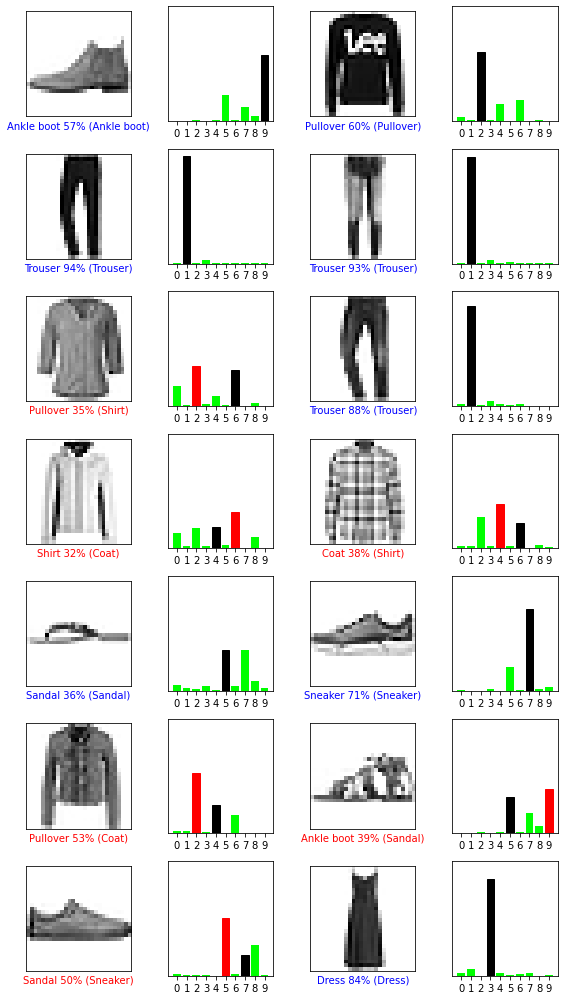




----------------------------------------------------------
PREDICCIONES CASO  4  FIGURAS  7  x  2


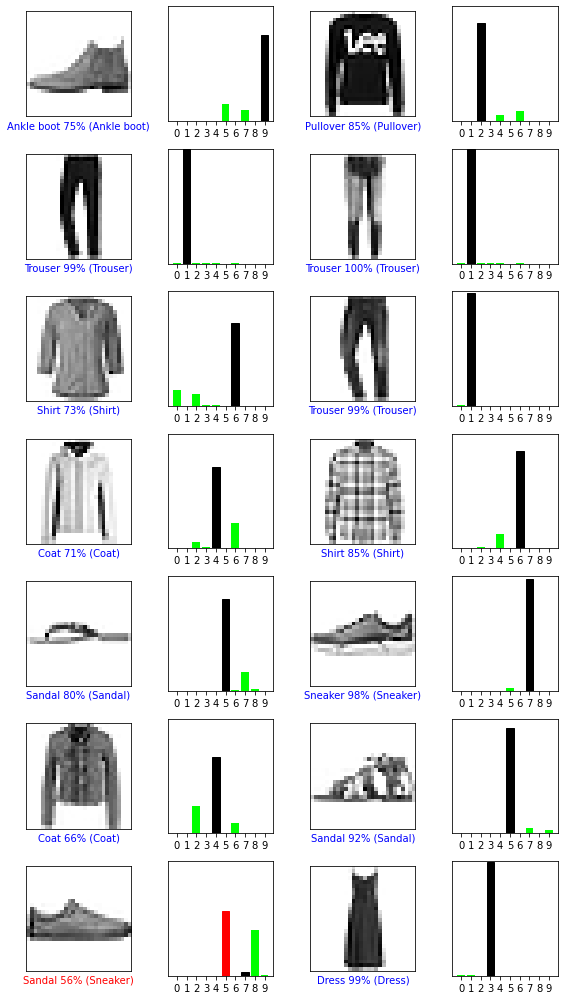




----------------------------------------------------------
PREDICCIONES CASO  5  FIGURAS  7  x  2


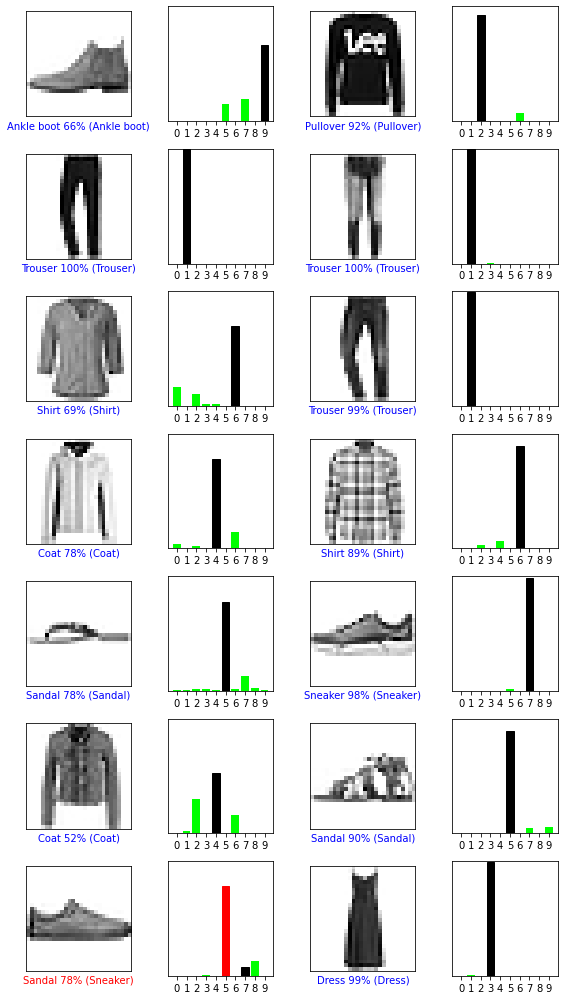




----------------------------------------------------------
PREDICCIONES CASO  6  FIGURAS  7  x  2


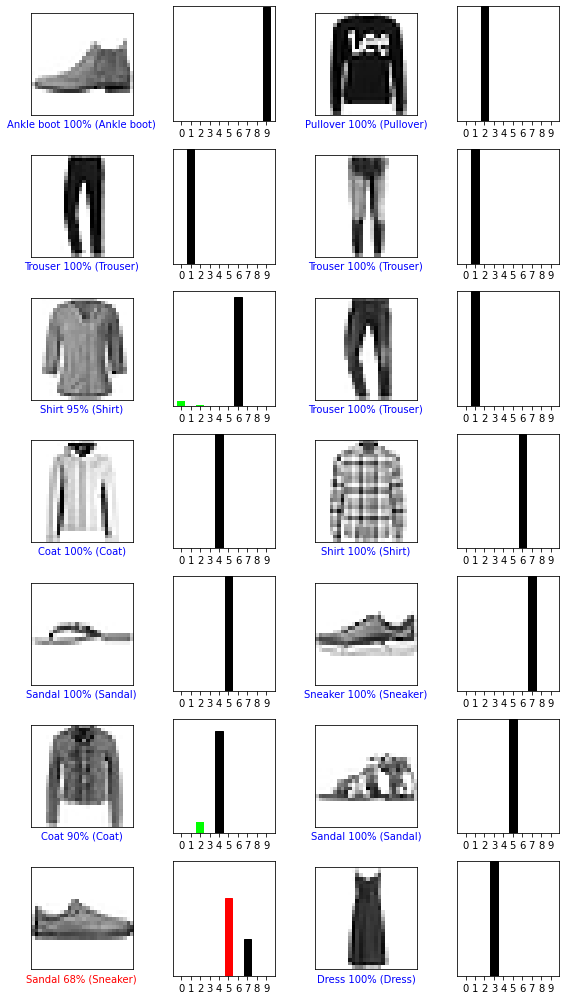




----------------------------------------------------------
PREDICCIONES CASO  7  FIGURAS  7  x  2


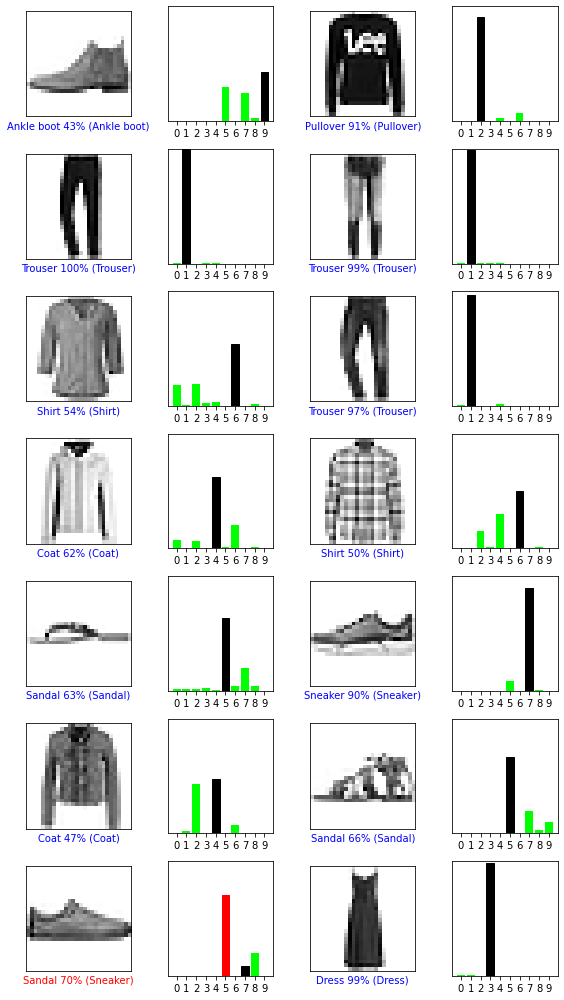




----------------------------------------------------------
PREDICCIONES CASO  8  FIGURAS  7  x  2


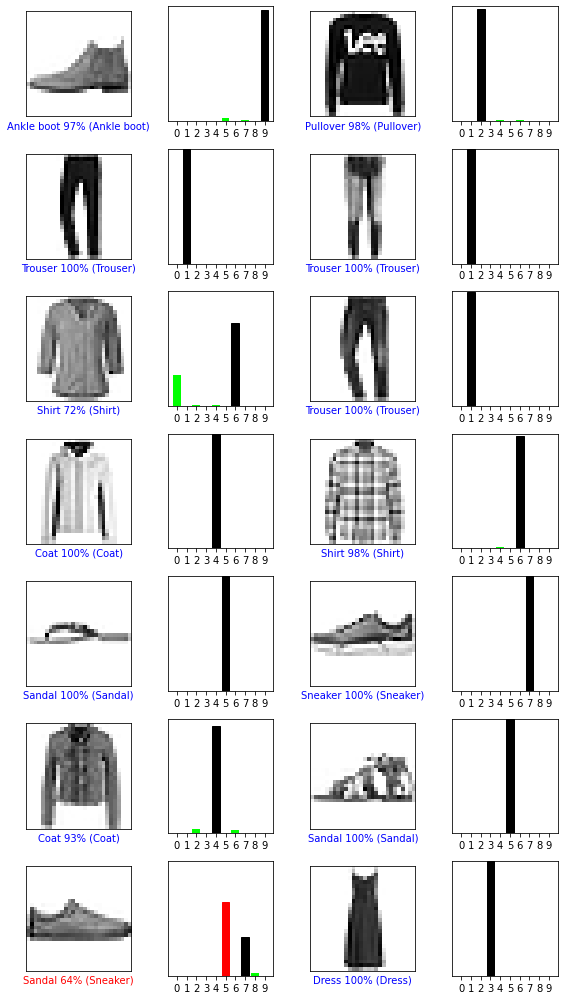

In [ ]:
def pintar_conjunto_casos_con_predicciones(num_rows, num_cols, casos):
  num_images = num_rows*num_cols
  for caso in range(casos):
    print("----------------------------------------------------------")
    print("PREDICCIONES CASO ", caso + 1 , " FIGURAS ", num_rows, " x ", num_cols)
    plt.figure(figsize=(2*2*num_cols, 2*num_rows))
    for i in range(num_images):
      plt.subplot(num_rows, 2*num_cols, 2*i+1)
      plot_image(i, predictions[caso][i], test_labels, test_images)
      plt.subplot(num_rows, 2*num_cols, 2*i+2)     
      plot_value_array(i, predictions[caso][i], test_labels)
    plt.tight_layout()
    plt.show()
    print("\n\n")

pintar_conjunto_casos_con_predicciones(7,2,8)


Cabria la pena destacar los siguientes casos, donde se equivoca:
* CASO 1
  - 7x1
* CASO 2
  - 7x1
* CASO 3
  - 3x1
  - 4x1
  - 4x2
  - 6x1
  - 6x2
  - 7x1
* CASO 5
  - 7x1
* CASO 6
  - 7x1
* CASO 7
  - 7x1
* CASO 8
  - 7x1

## Mejorar los modelos

* Podemos observar que la precisión obtenida de este modelo para estos datos (89% en el mejor de los casos) puede que no sea suficiente para un problema donde la precisión es importante (conducción automática). 
* Podríamos decir que es un resultado esperado, puesto que no hay una solución única para todos los problemas, sino que cada problema requiere su propia solución. 
* Ahora vamos a probar el optimizador `adam`. Recordemos que el 
optimizador es el algoritmo usado por el modelo para actualizar los pesos de cada una de sus capas en el proceso de entrenamiento. `Adam`, a veces, puede hacer converger mejor el proceso de optimización. Veámoslo:

In [ ]:
# CASO DE USO CON OPTIMIZADOR ADAM
for caso in range(casos):
  model = Sequential()
  model.add(Flatten(input_shape=(28, 28)))
  model.add(Dense(numero_neuronas_primera_capa[caso], activation=funcion_activacion_primera_capa[caso]))
  model.add(Dense(10, activation='softmax'))
  models.append(model)

for caso in range(casos):
  models[caso].compile(optimizer='Adam', loss=funcion_perdida[caso], metrics=[metrica[caso]])

for caso in range(casos):
  print("CASO ",caso + 1)
  print("---------------------------------")
  print("NÚMERO NEURONAS PRIMERA CAPA: ",numero_neuronas_primera_capa[caso])
  print("FUNCIÓN ACTIVACIÓN PRIMERA CAPA: ",funcion_activacion_primera_capa[caso])
  print("FUNCIÓN ACTIVACIÓN ULTIMA CAPA: softmax")
  print("OPTIMIZADOR: Adam")
  print("FUNCIÓN PÉRDIDA: ",funcion_perdida[caso])
  print("MÉTRICA: ",metrica[caso])
  print("---------------------------------")
  models[caso].fit(train_images, train_labels, epochs=numero_iteraciones[caso])
  print("\n\n")

test_loss = []
test_acc = []
for caso in range(casos):
  test_loss.append(models[caso].evaluate(test_images,  test_labels)[0])
  test_acc.append(models[caso].evaluate(test_images,  test_labels)[1])

for caso in range(casos):
  print("CASO ",caso + 1)
  print("---------------------------------")
  print("PERDIDA CON LOS DATOS DE TEST: ",test_loss[caso])
  print("PRECISIÓN CON LOS DATOS DE TEST: ",test_acc[caso])
  print("\n\n")

CASO  1
---------------------------------
NÚMERO NEURONAS PRIMERA CAPA:  10
FUNCIÓN ACTIVACIÓN PRIMERA CAPA:  relu
FUNCIÓN ACTIVACIÓN ULTIMA CAPA: softmax
OPTIMIZADOR: Adam
FUNCIÓN PÉRDIDA:  sparse_categorical_crossentropy
MÉTRICA:  accuracy
---------------------------------
Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4682 - accuracy: 0.8378
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4377 - accuracy: 0.8476
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4227 - accuracy: 0.8534
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4114 - accuracy: 0.8575
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4017 - accuracy: 0.8589



CASO  2
---------------------------------
NÚMERO NEURONAS PRIMERA CAPA:  10
FUNCIÓN ACTIVACIÓN PRIMERA CAPA:  relu
FUNCIÓN ACTIVACIÓN ULTIMA CAPA: softmax
OPTIMIZADOR: Adam
FUNCIÓN PÉRDIDA:  sparse_categorical_crosse

Como vemos, cambiando solo el optimizador ya hemos mejorado un  10% adicional la precisión del modelo, en el caso 3 y sobrepasando el 91% en el caso 8. Esto nos hace pensar que hay muchos elementos a tener en cuenta cuando definimos y configuramos el proceso de aprendizaje de 
una red neuronal. Con los datos de test, pasamos de un 87% en el caso 8 a un 89% (dos puntos porcentuales, en según que problemas, puede ser la diferencia entre que acepten el proyecto o no, y no digamos nada si nos jugamos miles de euros en una compatición de kaggle)

Veamos ahora el caso de subir el número de iteraciones a 25 para los casos 2 y 7

In [ ]:
for caso in range(casos):
  if caso==1 or caso ==6:
    model = Sequential()
    model.add(Flatten(input_shape=(28, 28)))
    model.add(Dense(numero_neuronas_primera_capa[caso], activation=funcion_activacion_primera_capa[caso]))
    model.add(Dense(10, activation='softmax'))
    models.append(model)

for caso in range(casos):
  if caso==1 or caso ==6:
    models[caso].compile(optimizer=optimizador[caso], loss=funcion_perdida[caso], metrics=[metrica[caso]])

for caso in range(casos):
  if caso==1 or caso ==6:
    print("CASO ",caso + 1)
    print("---------------------------------")
    print("NÚMERO NEURONAS PRIMERA CAPA: ",numero_neuronas_primera_capa[caso])
    print("FUNCIÓN ACTIVACIÓN PRIMERA CAPA: ",funcion_activacion_primera_capa[caso])
    print("FUNCIÓN ACTIVACIÓN ULTIMA CAPA: softmax")
    print("OPTIMIZADOR: ", optimizador[caso])
    print("FUNCIÓN PÉRDIDA: ",funcion_perdida[caso])
    print("MÉTRICA: ",metrica[caso])
    print("---------------------------------")
    models[caso].fit(train_images, train_labels, epochs=25)
    print("\n\n")

test_loss = []
test_acc = []
for caso in range(casos):
  if caso==1 or caso ==6:
    test_loss.append(models[caso].evaluate(test_images,  test_labels)[0])
    test_acc.append(models[caso].evaluate(test_images,  test_labels)[1])

for caso in range(2):
  print("CASO ",caso + 1)
  print("---------------------------------")
  print("PERDIDA CON LOS DATOS DE TEST: ",test_loss[caso])
  print("PRECISIÓN CON LOS DATOS DE TEST: ",test_acc[caso])
  print("\n\n")

CASO  2
---------------------------------
NÚMERO NEURONAS PRIMERA CAPA:  10
FUNCIÓN ACTIVACIÓN PRIMERA CAPA:  relu
FUNCIÓN ACTIVACIÓN ULTIMA CAPA: softmax
OPTIMIZADOR:  rmsprop
FUNCIÓN PÉRDIDA:  sparse_categorical_crossentropy
MÉTRICA:  accuracy
---------------------------------
Epoch 1/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3389 - accuracy: 0.8823
Epoch 2/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3371 - accuracy: 0.8817
Epoch 3/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3374 - accuracy: 0.8835
Epoch 4/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3382 - accuracy: 0.8823
Epoch 5/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3381 - accuracy: 0.8819
Epoch 6/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3377 - accuracy: 0.8827
Epoch 7/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3367 - accuracy: 0.8826
Epoch 

En el siguiente gráfico vemos las conclusiones finales:

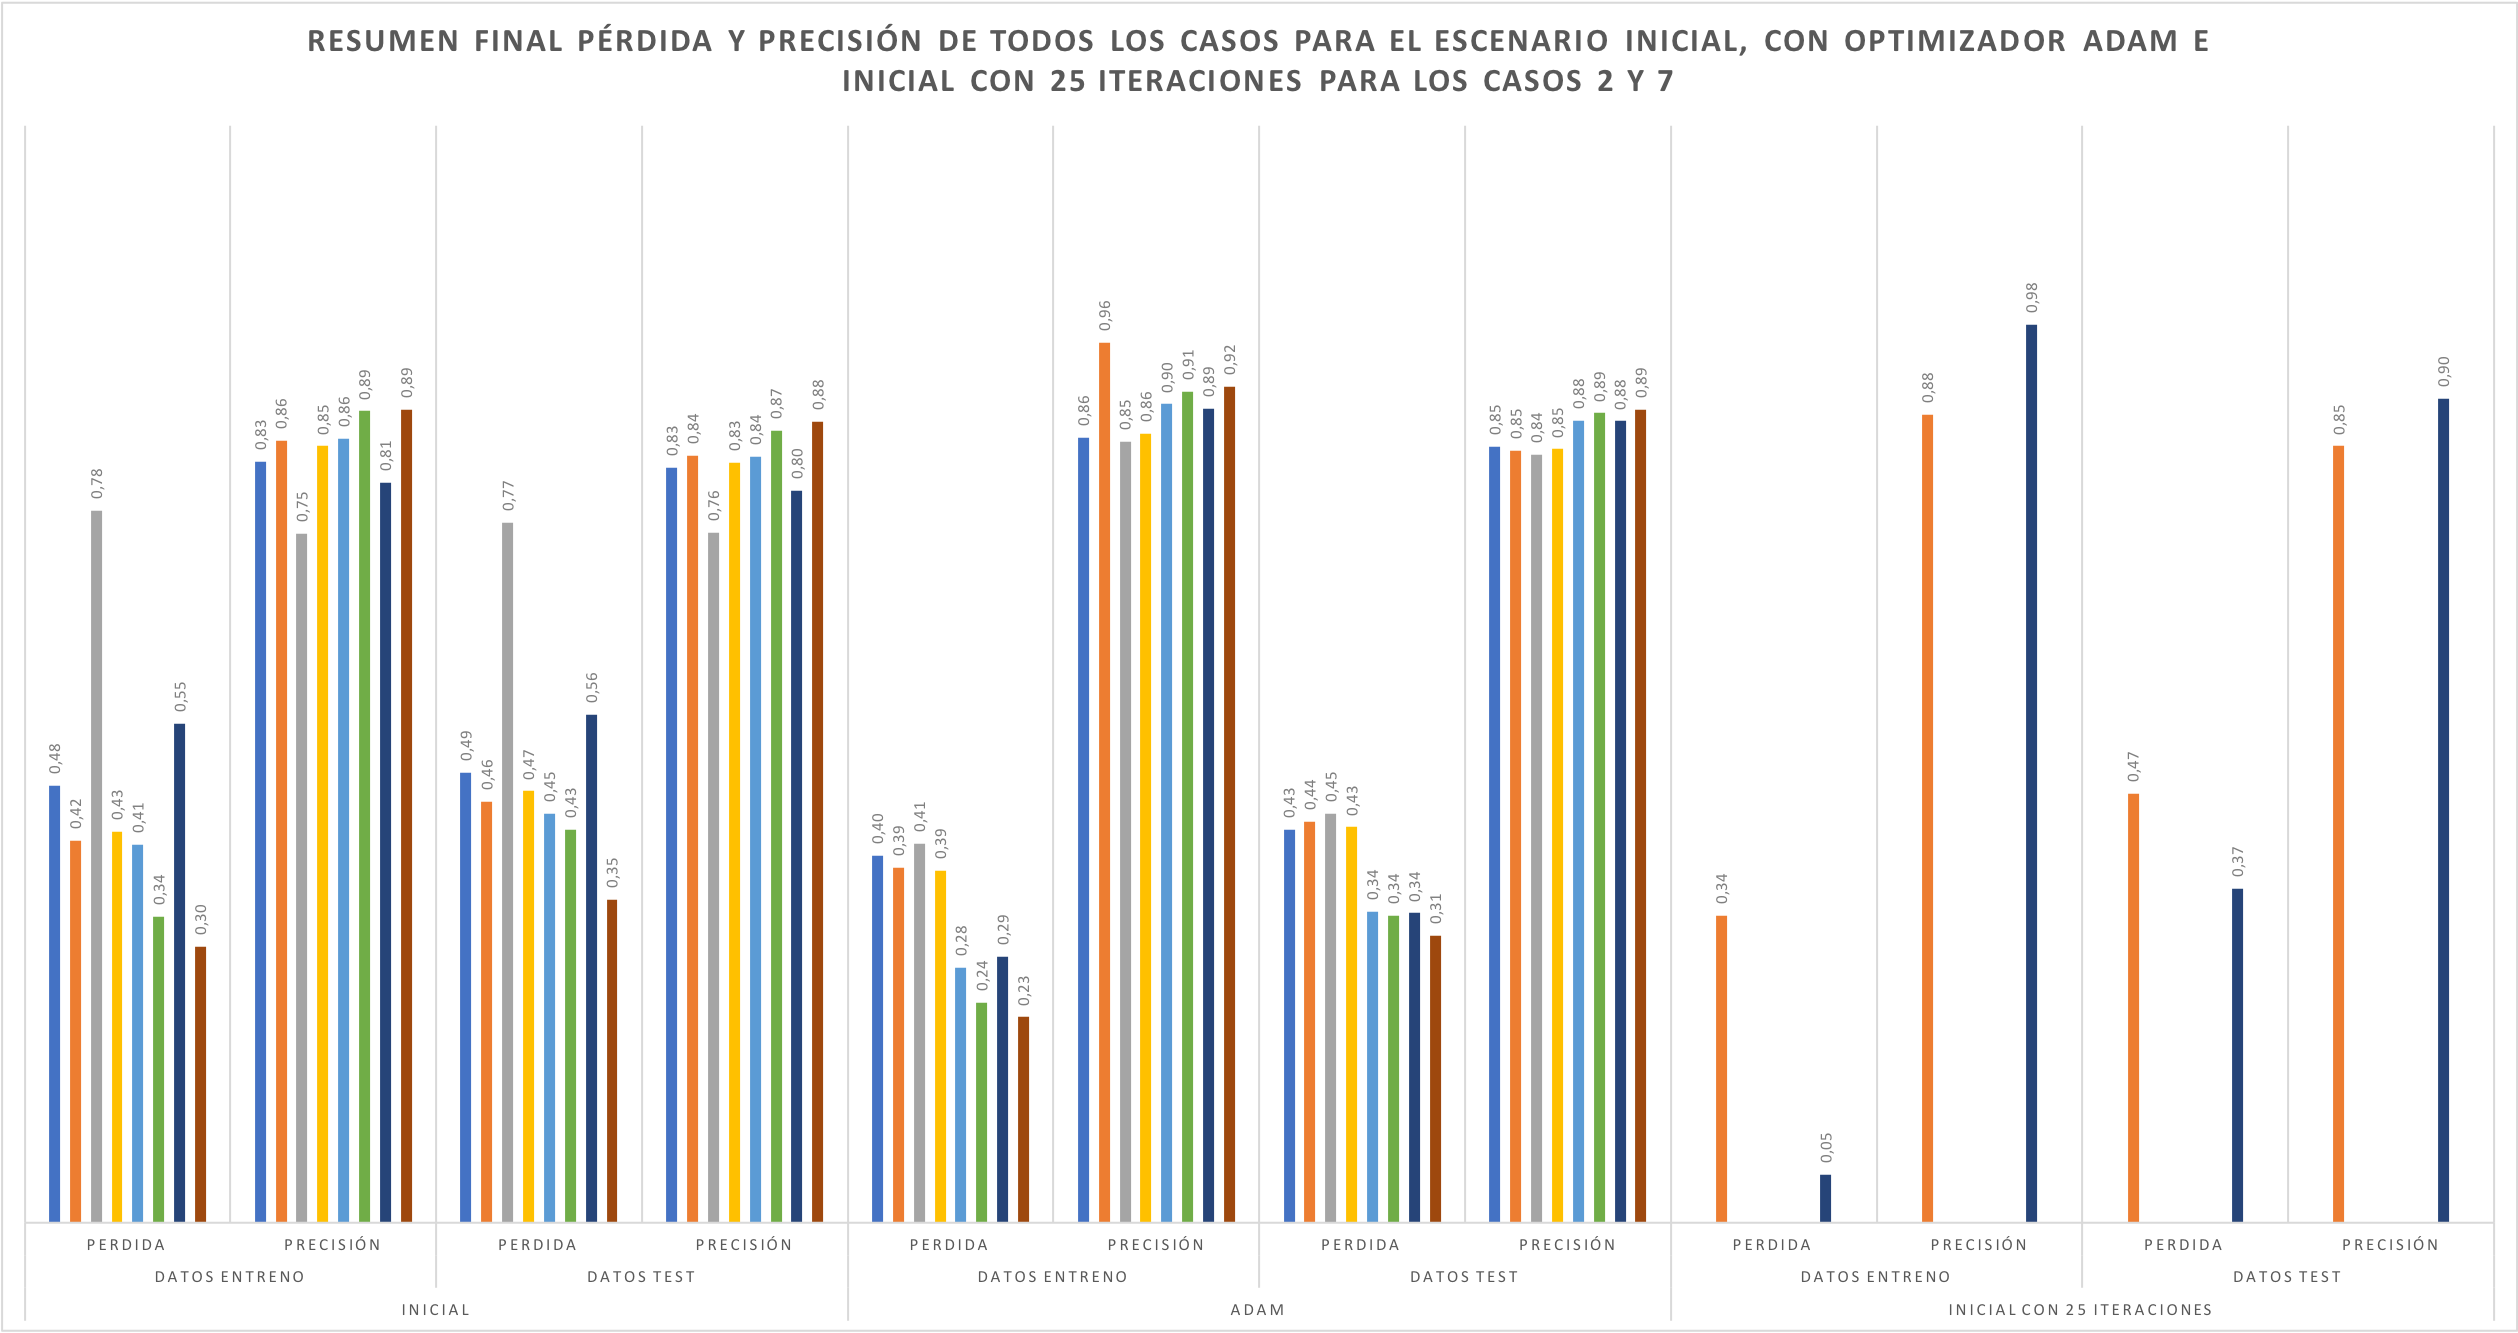

Básicamente, lo que vemos es: 
* Para el caso inicial: 
  - Con los datos de entrenamiento: 
    * El que mejor se comporta con menos pérdida y mayor precisión es el caso 8 (89% de precisión)
    * El que peor se comporta con mayor pérdida y menor precisión es el caso 3 (75% de precisión)
  - Con los datos de Test se sigue dando esta circunstancia (bajando un 1 p.p. la precisión del caso 8)
* Cuando metemos el optimizador Adam tenemos que:
  - Con los datos de entrenamiento: 
    * El que mejor se comporta con menos pérdida y mayor precisión vuelve a ser el caso 8 mejorando en 3 p.p. la precisión (llegando al 92%)
    * El que peor se comporta con mayor pérdida y menor precisión sigue siendo el caso 3 pero mejorando en 10 p.p. la precisión (hasta el 85%)
  - Con los datos de Test se sigue dando esta circunstancia (mejorando un 1 p.p. la precisión del caso 8 para los datos de test con la configuración inicial, pero 8 p.p. para el caso peor que era el 3)
* Para la configuración inicial y las 25 Iteraciones: 
  - Caso 2
    * Para los datos de entrenamiento
      - La pérdida baja 8 p.p.
      - La precisión aumenta 2 p.p.
    * Para los datos de Test
      - La pérdida aumenta 1 p.p.
      - La precisión aumenta 1 p.p.
  - Caso 7
    * Para los datos de entrenamiento
      - La pérdida disminuye 50 p.p.
      - La precisión aumenta 17 p.p. cosa que es espectacular
    * Para los datos de Test
      - La pérdida disminuye 19 p.p. 
      - La precisión aumenta 9 p.p. hasta el 90%



Hemos conseguido averiguar que el escenario que mejor nos funciona es el 8: 
* 512 neuronas en la primera capa
* Función activación `sigmoid` 
* Optimizador `Adam`
* 25 iteraciones de entrenamiento. 

Vamos a ver que datos nos acaba dando: 

In [6]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

from keras.utils.vis_utils import plot_model

2.7.0


In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

train_images = train_images / 255.0
test_images = test_images / 255.0

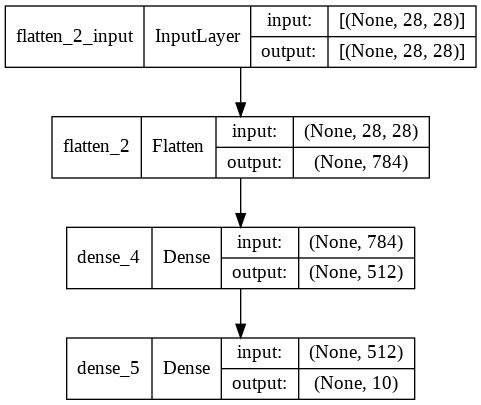

In [8]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(512, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))

plot_model(model, to_file='modeloFinal_plot.png', show_shapes=True)

In [9]:
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=25)

test_loss, test_acc = model.evaluate(test_images,  test_labels)

print("CASO 8")
print("---------------------------------")
print("PERDIDA CON LOS DATOS DE TEST: ",test_loss)
print("PRECISIÓN CON LOS DATOS DE TEST: ",test_acc)

Epoch 1/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5040 - accuracy: 0.8199
Epoch 2/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3832 - accuracy: 0.8609
Epoch 3/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3437 - accuracy: 0.8741
Epoch 4/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3148 - accuracy: 0.8844
Epoch 5/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2943 - accuracy: 0.8903
Epoch 6/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2754 - accuracy: 0.8966
Epoch 7/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2600 - accuracy: 0.9018
Epoch 8/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2462 - accuracy: 0.9074
Epoch 9/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2328 - accuracy: 0.9126
Epoch 10/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.220

* **Pérdida de 0,12 y precisión 96% con los datos de entrenamiento y pérdida de 0,36 y precisión del 90% con los datos de Test (esto es a lo máximo que, con lo que sabemos, podemos llegar). Veamos en la Práctica 2 que conseguimos con las Redes Neuronales Convolucionales...**

## CUESTION OPCIONAL 1: RENDIMIENTO DE LOS MODELOS SEGÚN EL NÚMERO DE ITERACIONES

In [1]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

print(tf.__version__)

2.7.0


In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

train_images = train_images / 255.0
test_images = test_images / 255.0

In [5]:
casos = 8
numero_neuronas_primera_capa = [10,10,10,10,512,512,512,512]
funcion_activacion_primera_capa = ['relu','relu','sigmoid','sigmoid','relu','relu','sigmoid','sigmoid']
optimizador =['sgd','rmsprop','sgd','rmsprop','sgd','rmsprop','sgd','rmsprop']
funcion_perdida = ['sparse_categorical_crossentropy', 'sparse_categorical_crossentropy','sparse_categorical_crossentropy',\
                   'sparse_categorical_crossentropy','sparse_categorical_crossentropy','sparse_categorical_crossentropy',\
                   'sparse_categorical_crossentropy','sparse_categorical_crossentropy']
numero_iteraciones = [5,5,5,5,5,5,5,5]
metrica = ['accuracy','accuracy','accuracy','accuracy','accuracy','accuracy','accuracy','accuracy']
models = []
historys = []

In [6]:
for caso in range(casos):
  model = Sequential()
  model.add(Flatten(input_shape=(28, 28)))
  model.add(Dense(numero_neuronas_primera_capa[caso], activation=funcion_activacion_primera_capa[caso]))
  model.add(Dense(10, activation='softmax'))
  models.append(model)

In [7]:
for caso in range(casos):
  models[caso].compile(optimizer=optimizador[caso], loss=funcion_perdida[caso], metrics=[metrica[caso]])

In [8]:
x_val = train_images[:10000]
partial_x_train = train_images[10000:]

y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

In [9]:
for caso in range(casos):
  print("CASO ",caso + 1)
  print("---------------------------------")
  print("NÚMERO NEURONAS PRIMERA CAPA: ",numero_neuronas_primera_capa[caso])
  print("FUNCIÓN ACTIVACIÓN PRIMERA CAPA: ",funcion_activacion_primera_capa[caso])
  print("FUNCIÓN ACTIVACIÓN ULTIMA CAPA: softmax")
  print("OPTIMIZADOR: ",optimizador[caso])
  print("FUNCIÓN PÉRDIDA: ",funcion_perdida[caso])
  print("MÉTRICA: ",metrica[caso])
  print("---------------------------------")
  historys.append(models[caso].fit(partial_x_train, partial_y_train, epochs=20, batch_size = 512, validation_data = (x_val, y_val)))
  print("\n\n")

CASO  1
---------------------------------
NÚMERO NEURONAS PRIMERA CAPA:  10
FUNCIÓN ACTIVACIÓN PRIMERA CAPA:  relu
FUNCIÓN ACTIVACIÓN ULTIMA CAPA: softmax
OPTIMIZADOR:  sgd
FUNCIÓN PÉRDIDA:  sparse_categorical_crossentropy
MÉTRICA:  accuracy
---------------------------------
Epoch 1/20
98/98 [==============================] - 2s 7ms/step - loss: 2.0696 - accuracy: 0.2998 - val_loss: 1.9006 - val_accuracy: 0.4028
Epoch 2/20
98/98 [==============================] - 0s 5ms/step - loss: 1.7545 - accuracy: 0.4696 - val_loss: 1.6135 - val_accuracy: 0.5101
Epoch 3/20
98/98 [==============================] - 0s 5ms/step - loss: 1.4721 - accuracy: 0.5432 - val_loss: 1.3281 - val_accuracy: 0.5635
Epoch 4/20
98/98 [==============================] - 0s 5ms/step - loss: 1.2061 - accuracy: 0.6205 - val_loss: 1.0910 - val_accuracy: 0.6717
Epoch 5/20
98/98 [==============================] - 0s 5ms/step - loss: 1.0185 - accuracy: 0.6795 - val_loss: 0.9555 - val_accuracy: 0.6909
Epoch 6/20
98/98 [======

CASO  1
---------------------------------
NÚMERO NEURONAS PRIMERA CAPA:  10
FUNCIÓN ACTIVACIÓN PRIMERA CAPA:  relu
FUNCIÓN ACTIVACIÓN ULTIMA CAPA: softmax
OPTIMIZADOR:  sgd
FUNCIÓN PÉRDIDA:  sparse_categorical_crossentropy
MÉTRICA:  accuracy
---------------------------------
[2.0696022510528564, 1.7545477151870728, 1.4721451997756958, 1.2061262130737305, 1.0184680223464966, 0.9180058836936951, 0.8558295965194702, 0.8114988803863525, 0.7773849368095398, 0.7496930956840515, 0.7266570329666138, 0.7068213820457458, 0.6896892786026001, 0.6744542121887207, 0.6609399914741516, 0.6487261056900024, 0.6376546025276184, 0.6275120973587036, 0.618452250957489, 0.6098682880401611]
[0.29980000853538513, 0.46959999203681946, 0.5432000160217285, 0.6205400228500366, 0.6794999837875366, 0.6942800283432007, 0.7074599862098694, 0.7199599742889404, 0.7307199835777283, 0.7396799921989441, 0.7484400272369385, 0.7556999921798706, 0.7629200220108032, 0.7692599892616272, 0.7746999859809875, 0.7792999744415283, 0

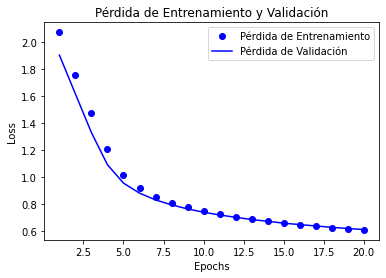

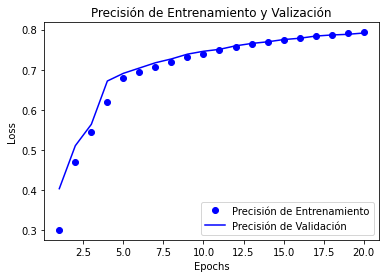

CASO  2
---------------------------------
NÚMERO NEURONAS PRIMERA CAPA:  10
FUNCIÓN ACTIVACIÓN PRIMERA CAPA:  relu
FUNCIÓN ACTIVACIÓN ULTIMA CAPA: softmax
OPTIMIZADOR:  rmsprop
FUNCIÓN PÉRDIDA:  sparse_categorical_crossentropy
MÉTRICA:  accuracy
---------------------------------
[1.3767240047454834, 0.757110595703125, 0.5989715456962585, 0.5441616177558899, 0.5130795836448669, 0.4903504252433777, 0.47453561425209045, 0.46146491169929504, 0.45216354727745056, 0.442085862159729, 0.4361223578453064, 0.4304075539112091, 0.42568305134773254, 0.4206226170063019, 0.4165422022342682, 0.4134911596775055, 0.40957945585250854, 0.40629008412361145, 0.40319886803627014, 0.4006865322589874]
[0.535319983959198, 0.7564600110054016, 0.8036999702453613, 0.817359983921051, 0.8258600234985352, 0.8317999839782715, 0.8361999988555908, 0.8414999842643738, 0.8436800241470337, 0.8468599915504456, 0.8483200073242188, 0.8512200117111206, 0.852940022945404, 0.8543199896812439, 0.855679988861084, 0.856599986553192

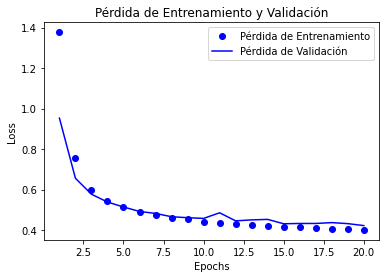

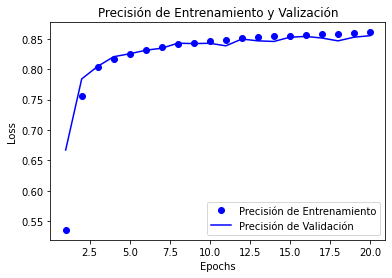

CASO  3
---------------------------------
NÚMERO NEURONAS PRIMERA CAPA:  10
FUNCIÓN ACTIVACIÓN PRIMERA CAPA:  sigmoid
FUNCIÓN ACTIVACIÓN ULTIMA CAPA: softmax
OPTIMIZADOR:  sgd
FUNCIÓN PÉRDIDA:  sparse_categorical_crossentropy
MÉTRICA:  accuracy
---------------------------------
[2.376882553100586, 2.2383832931518555, 2.167205572128296, 2.101553201675415, 2.0406124591827393, 1.9836467504501343, 1.9292763471603394, 1.8769217729568481, 1.8263554573059082, 1.777523159980774, 1.7303993701934814, 1.6850138902664185, 1.6413965225219727, 1.5995850563049316, 1.5595667362213135, 1.5213440656661987, 1.484924554824829, 1.4502547979354858, 1.4172778129577637, 1.3859518766403198]
[0.10081999748945236, 0.17125999927520752, 0.3155600130558014, 0.3846200108528137, 0.4582799971103668, 0.5059999823570251, 0.5399199724197388, 0.5609999895095825, 0.5759599804878235, 0.5876399874687195, 0.5985199809074402, 0.606220006942749, 0.6141800284385681, 0.6219199895858765, 0.6300399899482727, 0.6370000243186951, 0.6

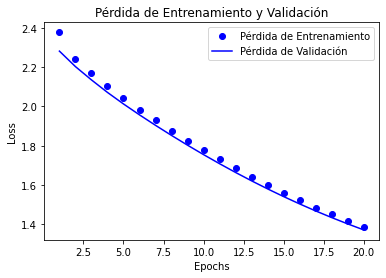

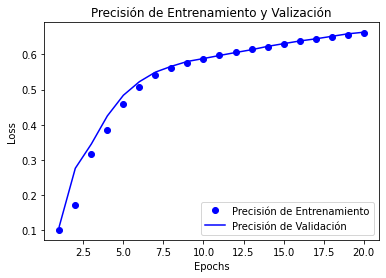

CASO  4
---------------------------------
NÚMERO NEURONAS PRIMERA CAPA:  10
FUNCIÓN ACTIVACIÓN PRIMERA CAPA:  sigmoid
FUNCIÓN ACTIVACIÓN ULTIMA CAPA: softmax
OPTIMIZADOR:  rmsprop
FUNCIÓN PÉRDIDA:  sparse_categorical_crossentropy
MÉTRICA:  accuracy
---------------------------------
[1.8801326751708984, 1.4717521667480469, 1.2452784776687622, 1.078462839126587, 0.9505111575126648, 0.8517208099365234, 0.7743020057678223, 0.7125470042228699, 0.6629685759544373, 0.6221721172332764, 0.5892474055290222, 0.5620834827423096, 0.5393400192260742, 0.5202344059944153, 0.5039606094360352, 0.48994848132133484, 0.47772613167762756, 0.46729159355163574, 0.4582076966762543, 0.45002612471580505]
[0.40654000639915466, 0.6135600209236145, 0.6785399913787842, 0.7115799784660339, 0.7422000169754028, 0.7857999801635742, 0.7989199757575989, 0.8071600198745728, 0.8154000043869019, 0.8196600079536438, 0.8248400092124939, 0.8285800218582153, 0.8322200179100037, 0.8347600102424622, 0.838379979133606, 0.8395400047

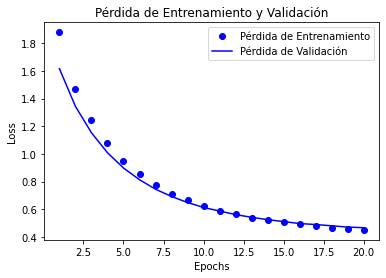

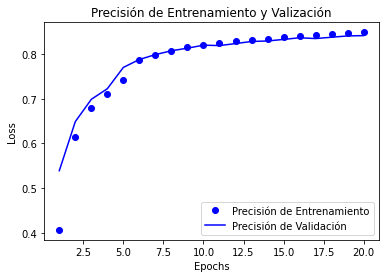

CASO  5
---------------------------------
NÚMERO NEURONAS PRIMERA CAPA:  512
FUNCIÓN ACTIVACIÓN PRIMERA CAPA:  relu
FUNCIÓN ACTIVACIÓN ULTIMA CAPA: softmax
OPTIMIZADOR:  sgd
FUNCIÓN PÉRDIDA:  sparse_categorical_crossentropy
MÉTRICA:  accuracy
---------------------------------
[1.5560015439987183, 1.0198334455490112, 0.8615573644638062, 0.7806485891342163, 0.7291285991668701, 0.6919795274734497, 0.6634633541107178, 0.6405766606330872, 0.6217777132987976, 0.6056801676750183, 0.5919693112373352, 0.5799416303634644, 0.5691429972648621, 0.5597338080406189, 0.5511261820793152, 0.543496310710907, 0.5363842844963074, 0.530023992061615, 0.5238283276557922, 0.5184663534164429]
[0.5655800104141235, 0.6972200274467468, 0.7352200150489807, 0.7574999928474426, 0.7718200087547302, 0.7823200225830078, 0.7895799875259399, 0.7964199781417847, 0.8023200035095215, 0.8066999912261963, 0.809440016746521, 0.812720000743866, 0.8149799704551697, 0.8177000284194946, 0.82014000415802, 0.8229799866676331, 0.82375

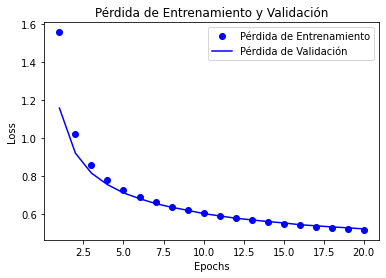

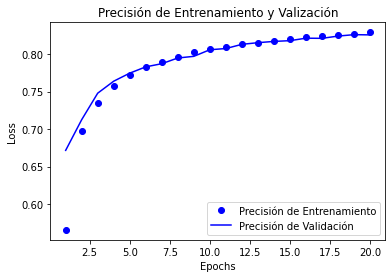

CASO  6
---------------------------------
NÚMERO NEURONAS PRIMERA CAPA:  512
FUNCIÓN ACTIVACIÓN PRIMERA CAPA:  relu
FUNCIÓN ACTIVACIÓN ULTIMA CAPA: softmax
OPTIMIZADOR:  rmsprop
FUNCIÓN PÉRDIDA:  sparse_categorical_crossentropy
MÉTRICA:  accuracy
---------------------------------
[0.7665181159973145, 0.5035836100578308, 0.43096405267715454, 0.3882042169570923, 0.3576921224594116, 0.33529576659202576, 0.318913996219635, 0.30344703793525696, 0.29071903228759766, 0.2776631712913513, 0.26469656825065613, 0.25812509655952454, 0.25038039684295654, 0.242283433675766, 0.23498326539993286, 0.22573649883270264, 0.22155611217021942, 0.21171779930591583, 0.2082989513874054, 0.20074507594108582]
[0.7423999905586243, 0.8179000020027161, 0.8428199887275696, 0.8572999835014343, 0.868619978427887, 0.8773199915885925, 0.8829200267791748, 0.88919997215271, 0.893060028553009, 0.8969200253486633, 0.9015200138092041, 0.9043400287628174, 0.9077200293540955, 0.9096999764442444, 0.9128199815750122, 0.915719985

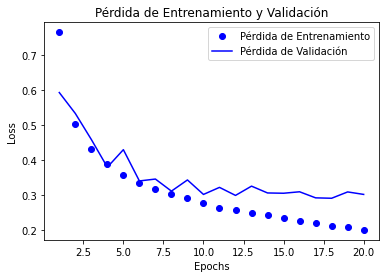

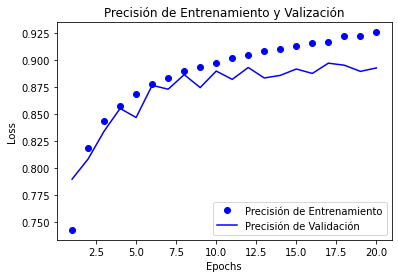

CASO  7
---------------------------------
NÚMERO NEURONAS PRIMERA CAPA:  512
FUNCIÓN ACTIVACIÓN PRIMERA CAPA:  sigmoid
FUNCIÓN ACTIVACIÓN ULTIMA CAPA: softmax
OPTIMIZADOR:  sgd
FUNCIÓN PÉRDIDA:  sparse_categorical_crossentropy
MÉTRICA:  accuracy
---------------------------------
[2.1203155517578125, 1.8337409496307373, 1.6238212585449219, 1.4632138013839722, 1.3394842147827148, 1.2429111003875732, 1.1660141944885254, 1.1037580966949463, 1.0522023439407349, 1.008998155593872, 0.9721327424049377, 0.940380871295929, 0.9128867983818054, 0.8886374831199646, 0.8672277927398682, 0.8480193614959717, 0.8308791518211365, 0.8153657913208008, 0.8012300729751587, 0.7883560657501221]
[0.3946399986743927, 0.6160200238227844, 0.6588199734687805, 0.6788399815559387, 0.6932399868965149, 0.7017999887466431, 0.7077199816703796, 0.7123000025749207, 0.7182599902153015, 0.7226399779319763, 0.7256199717521667, 0.728879988193512, 0.7319599986076355, 0.7340599894523621, 0.737500011920929, 0.739080011844635, 0.7

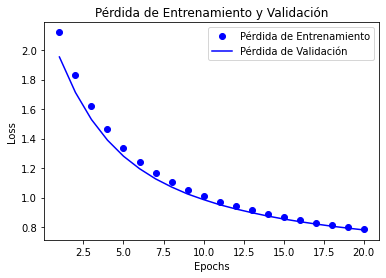

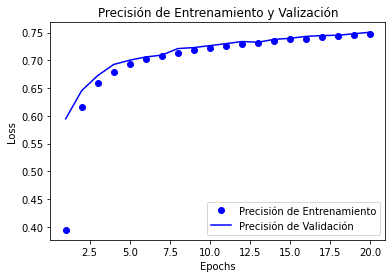

CASO  8
---------------------------------
NÚMERO NEURONAS PRIMERA CAPA:  512
FUNCIÓN ACTIVACIÓN PRIMERA CAPA:  sigmoid
FUNCIÓN ACTIVACIÓN ULTIMA CAPA: softmax
OPTIMIZADOR:  rmsprop
FUNCIÓN PÉRDIDA:  sparse_categorical_crossentropy
MÉTRICA:  accuracy
---------------------------------
[0.8238426446914673, 0.5346093773841858, 0.4761500358581543, 0.44712409377098083, 0.4241091310977936, 0.40904709696769714, 0.39400574564933777, 0.38051244616508484, 0.370267391204834, 0.3602801263332367, 0.35242608189582825, 0.3443106710910797, 0.33597370982170105, 0.3301360607147217, 0.3227440118789673, 0.3158647418022156, 0.31009596586227417, 0.3048350512981415, 0.30053991079330444, 0.2947913706302643]
[0.7245000004768372, 0.8076199889183044, 0.8275799751281738, 0.8374199867248535, 0.8460000157356262, 0.8518999814987183, 0.8572400212287903, 0.8603600263595581, 0.864799976348877, 0.8677999973297119, 0.8708999752998352, 0.8736799955368042, 0.8766199946403503, 0.8787999749183655, 0.8832799792289734, 0.883759

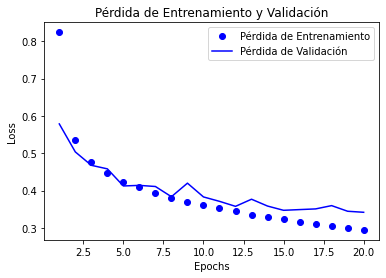

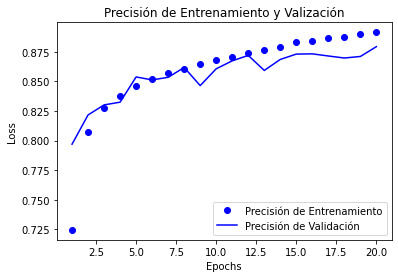

In [10]:
for caso in range(casos):
  print("CASO ",caso + 1)
  print("---------------------------------")
  print("NÚMERO NEURONAS PRIMERA CAPA: ",numero_neuronas_primera_capa[caso])
  print("FUNCIÓN ACTIVACIÓN PRIMERA CAPA: ",funcion_activacion_primera_capa[caso])
  print("FUNCIÓN ACTIVACIÓN ULTIMA CAPA: softmax")
  print("OPTIMIZADOR: ",optimizador[caso])
  print("FUNCIÓN PÉRDIDA: ",funcion_perdida[caso])
  print("MÉTRICA: ",metrica[caso])
  print("---------------------------------")
  history_dict = historys[caso].history
  history_dict.keys()
  print(history_dict['loss'])
  print(history_dict['accuracy'])
  print(history_dict['val_loss'])
  print(history_dict['val_accuracy'])
  accuracy = historys[caso].history['accuracy']
  val_accuracy = historys[caso].history['val_accuracy']
  loss = historys[caso ].history['loss']
  val_loss = historys[caso].history['val_loss']
  epochs = range(1, len(accuracy) + 1)
  plt.plot(epochs, loss, 'bo', label='Pérdida de Entrenamiento')
  plt.plot(epochs, val_loss, 'b', label='Pérdida de Validación')
  plt.title('Pérdida de Entrenamiento y Validación')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()
  print("\n\n")
  
  plt.clf()
  accuracy_values = history_dict['accuracy']
  val_accuracy_values = history_dict['val_accuracy']
  plt.plot(epochs, accuracy, 'bo', label='Precisión de Entrenamiento')
  plt.plot(epochs, val_accuracy, 'b', label='Precisión de Validación')
  plt.title('Precisión de Entrenamiento y Valización')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

In [11]:
test_loss = []
test_acc = []
for caso in range(casos):
  test_loss.append(models[caso].evaluate(test_images,  test_labels)[0])
  test_acc.append(models[caso].evaluate(test_images,  test_labels)[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.3707 - accuracy: 0.8677


In [12]:
for caso in range(casos):
  print("CASO ",caso + 1)
  print("---------------------------------")
  print("PERDIDA CON LOS DATOS DE TEST: ",test_loss[caso])
  print("PRECISIÓN CON LOS DATOS DE TEST: ",test_acc[caso])
  print("\n\n")

CASO  1
---------------------------------
PERDIDA CON LOS DATOS DE TEST:  0.6298120021820068
PRECISIÓN CON LOS DATOS DE TEST:  0.781499981880188



CASO  2
---------------------------------
PERDIDA CON LOS DATOS DE TEST:  0.4492059051990509
PRECISIÓN CON LOS DATOS DE TEST:  0.8447999954223633



CASO  3
---------------------------------
PERDIDA CON LOS DATOS DE TEST:  1.378839135169983
PRECISIÓN CON LOS DATOS DE TEST:  0.6575999855995178



CASO  4
---------------------------------
PERDIDA CON LOS DATOS DE TEST:  0.4911060929298401
PRECISIÓN CON LOS DATOS DE TEST:  0.8327999711036682



CASO  5
---------------------------------
PERDIDA CON LOS DATOS DE TEST:  0.5408041477203369
PRECISIÓN CON LOS DATOS DE TEST:  0.8187000155448914



CASO  6
---------------------------------
PERDIDA CON LOS DATOS DE TEST:  0.33865609765052795
PRECISIÓN CON LOS DATOS DE TEST:  0.885200023651123



CASO  7
---------------------------------
PERDIDA CON LOS DATOS DE TEST:  0.7940651774406433
PRECISIÓN CON L

## CUESTIÓN OPCIONAL 2: MATRIZ DE CONFUSIÓN DE LOS MODELOS

In [27]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

from keras.utils.np_utils import to_categorical

from collections import Counter
from sklearn.metrics import confusion_matrix
import itertools

print(tf.__version__)

2.7.0


In [14]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [15]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [16]:
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

train_images = train_images / 255.0
test_images = test_images / 255.0

In [17]:
casos = 8
numero_neuronas_primera_capa = [10,10,10,10,512,512,512,512]
funcion_activacion_primera_capa = ['relu','relu','sigmoid','sigmoid','relu','relu','sigmoid','sigmoid']
optimizador =['sgd','rmsprop','sgd','rmsprop','sgd','rmsprop','sgd','rmsprop']
funcion_perdida = ['sparse_categorical_crossentropy', 'sparse_categorical_crossentropy','sparse_categorical_crossentropy',\
                   'sparse_categorical_crossentropy','sparse_categorical_crossentropy','sparse_categorical_crossentropy',\
                   'sparse_categorical_crossentropy','sparse_categorical_crossentropy']
numero_iteraciones = [5,5,5,5,5,5,5,5]
metrica = ['accuracy','accuracy','accuracy','accuracy','accuracy','accuracy','accuracy','accuracy']
models = []
historys = []

In [18]:
for caso in range(casos):
  model = Sequential()
  model.add(Flatten(input_shape=(28, 28)))
  model.add(Dense(numero_neuronas_primera_capa[caso], activation=funcion_activacion_primera_capa[caso]))
  model.add(Dense(10, activation='softmax'))
  models.append(model)

In [19]:
for caso in range(casos):
  models[caso].compile(optimizer=optimizador[caso], loss=funcion_perdida[caso], metrics=[metrica[caso]])

In [20]:
for caso in range(casos):
  print("CASO ",caso + 1)
  print("---------------------------------")
  print("NÚMERO NEURONAS PRIMERA CAPA: ",numero_neuronas_primera_capa[caso])
  print("FUNCIÓN ACTIVACIÓN PRIMERA CAPA: ",funcion_activacion_primera_capa[caso])
  print("FUNCIÓN ACTIVACIÓN ULTIMA CAPA: softmax")
  print("OPTIMIZADOR: ",optimizador[caso])
  print("FUNCIÓN PÉRDIDA: ",funcion_perdida[caso])
  print("MÉTRICA: ",metrica[caso])
  print("---------------------------------")
  models[caso].fit(train_images, train_labels, epochs=numero_iteraciones[caso])
  print("\n\n")

CASO  1
---------------------------------
NÚMERO NEURONAS PRIMERA CAPA:  10
FUNCIÓN ACTIVACIÓN PRIMERA CAPA:  relu
FUNCIÓN ACTIVACIÓN ULTIMA CAPA: softmax
OPTIMIZADOR:  sgd
FUNCIÓN PÉRDIDA:  sparse_categorical_crossentropy
MÉTRICA:  accuracy
---------------------------------
Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.9333 - accuracy: 0.6852
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5842 - accuracy: 0.7992
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5255 - accuracy: 0.8189
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4961 - accuracy: 0.8281
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4779 - accuracy: 0.8340



CASO  2
---------------------------------
NÚMERO NEURONAS PRIMERA CAPA:  10
FUNCIÓN ACTIVACIÓN PRIMERA CAPA:  relu
FUNCIÓN ACTIVACIÓN ULTIMA CAPA: softmax
OPTIMIZADOR:  rmsprop
FUNCIÓN PÉRDIDA:  sparse_categorical_cr

In [21]:
test_loss = []
test_acc = []
for caso in range(casos):
  test_loss.append(models[caso].evaluate(test_images,  test_labels)[0])
  test_acc.append(models[caso].evaluate(test_images,  test_labels)[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.3868 - accuracy: 0.8684


In [22]:
for caso in range(casos):
  print("CASO ",caso + 1)
  print("---------------------------------")
  print("PERDIDA CON LOS DATOS DE TEST: ",test_loss[caso])
  print("PRECISIÓN CON LOS DATOS DE TEST: ",test_acc[caso])
  print("\n\n")

CASO  1
---------------------------------
PERDIDA CON LOS DATOS DE TEST:  0.5024704337120056
PRECISIÓN CON LOS DATOS DE TEST:  0.8248999714851379



CASO  2
---------------------------------
PERDIDA CON LOS DATOS DE TEST:  0.4704027473926544
PRECISIÓN CON LOS DATOS DE TEST:  0.839900016784668



CASO  3
---------------------------------
PERDIDA CON LOS DATOS DE TEST:  0.7864617705345154
PRECISIÓN CON LOS DATOS DE TEST:  0.7199000120162964



CASO  4
---------------------------------
PERDIDA CON LOS DATOS DE TEST:  0.4573606550693512
PRECISIÓN CON LOS DATOS DE TEST:  0.838699996471405



CASO  5
---------------------------------
PERDIDA CON LOS DATOS DE TEST:  0.4356127083301544
PRECISIÓN CON LOS DATOS DE TEST:  0.8490999937057495



CASO  6
---------------------------------
PERDIDA CON LOS DATOS DE TEST:  0.5151560306549072
PRECISIÓN CON LOS DATOS DE TEST:  0.8539999723434448



CASO  7
---------------------------------
PERDIDA CON LOS DATOS DE TEST:  0.5525870323181152
PRECISIÓN CON L

In [23]:
# Look at confusion matrix 
# Note, this code is taken straight from the SKLEARN website, an nice way of 
# viewing confusion matrix.
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Observación')
    plt.xlabel('Predicción')

CASO  1
---------------------------------
NÚMERO NEURONAS PRIMERA CAPA:  10
FUNCIÓN ACTIVACIÓN PRIMERA CAPA:  relu
FUNCIÓN ACTIVACIÓN ULTIMA CAPA: softmax
OPTIMIZADOR:  sgd
FUNCIÓN PÉRDIDA:  sparse_categorical_crossentropy
MÉTRICA:  accuracy
---------------------------------


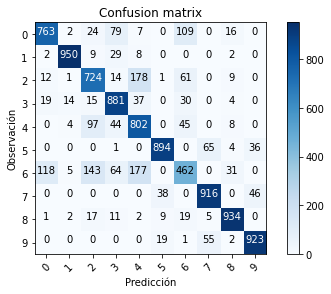




CASO  2
---------------------------------
NÚMERO NEURONAS PRIMERA CAPA:  10
FUNCIÓN ACTIVACIÓN PRIMERA CAPA:  relu
FUNCIÓN ACTIVACIÓN ULTIMA CAPA: softmax
OPTIMIZADOR:  rmsprop
FUNCIÓN PÉRDIDA:  sparse_categorical_crossentropy
MÉTRICA:  accuracy
---------------------------------


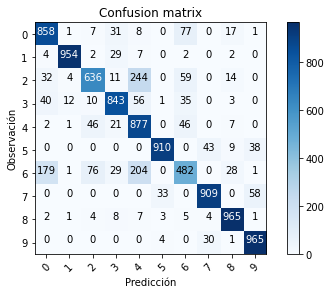




CASO  3
---------------------------------
NÚMERO NEURONAS PRIMERA CAPA:  10
FUNCIÓN ACTIVACIÓN PRIMERA CAPA:  sigmoid
FUNCIÓN ACTIVACIÓN ULTIMA CAPA: softmax
OPTIMIZADOR:  sgd
FUNCIÓN PÉRDIDA:  sparse_categorical_crossentropy
MÉTRICA:  accuracy
---------------------------------


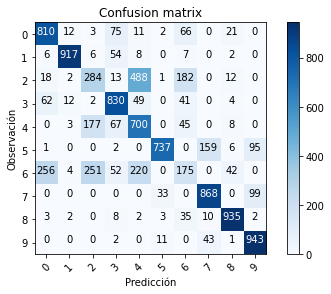




CASO  4
---------------------------------
NÚMERO NEURONAS PRIMERA CAPA:  10
FUNCIÓN ACTIVACIÓN PRIMERA CAPA:  sigmoid
FUNCIÓN ACTIVACIÓN ULTIMA CAPA: softmax
OPTIMIZADOR:  rmsprop
FUNCIÓN PÉRDIDA:  sparse_categorical_crossentropy
MÉTRICA:  accuracy
---------------------------------


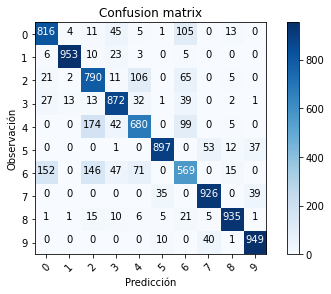




CASO  5
---------------------------------
NÚMERO NEURONAS PRIMERA CAPA:  512
FUNCIÓN ACTIVACIÓN PRIMERA CAPA:  relu
FUNCIÓN ACTIVACIÓN ULTIMA CAPA: softmax
OPTIMIZADOR:  sgd
FUNCIÓN PÉRDIDA:  sparse_categorical_crossentropy
MÉTRICA:  accuracy
---------------------------------


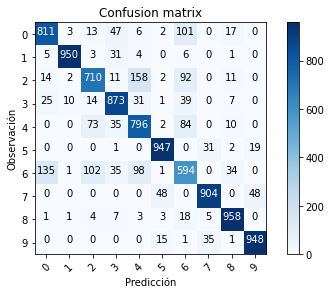




CASO  6
---------------------------------
NÚMERO NEURONAS PRIMERA CAPA:  512
FUNCIÓN ACTIVACIÓN PRIMERA CAPA:  relu
FUNCIÓN ACTIVACIÓN ULTIMA CAPA: softmax
OPTIMIZADOR:  rmsprop
FUNCIÓN PÉRDIDA:  sparse_categorical_crossentropy
MÉTRICA:  accuracy
---------------------------------


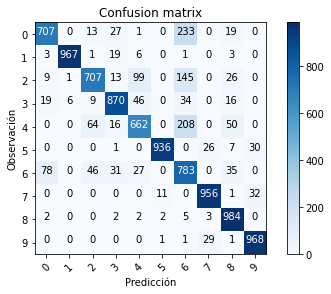




CASO  7
---------------------------------
NÚMERO NEURONAS PRIMERA CAPA:  512
FUNCIÓN ACTIVACIÓN PRIMERA CAPA:  sigmoid
FUNCIÓN ACTIVACIÓN ULTIMA CAPA: softmax
OPTIMIZADOR:  sgd
FUNCIÓN PÉRDIDA:  sparse_categorical_crossentropy
MÉTRICA:  accuracy
---------------------------------


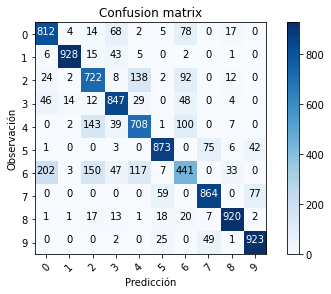




CASO  8
---------------------------------
NÚMERO NEURONAS PRIMERA CAPA:  512
FUNCIÓN ACTIVACIÓN PRIMERA CAPA:  sigmoid
FUNCIÓN ACTIVACIÓN ULTIMA CAPA: softmax
OPTIMIZADOR:  rmsprop
FUNCIÓN PÉRDIDA:  sparse_categorical_crossentropy
MÉTRICA:  accuracy
---------------------------------


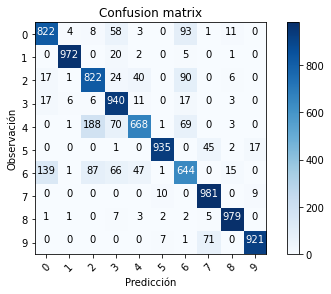

In [30]:
test_labelsp = to_categorical(test_labels)
for caso in range(casos):
  print("CASO ",caso + 1)
  print("---------------------------------")
  print("NÚMERO NEURONAS PRIMERA CAPA: ",numero_neuronas_primera_capa[caso])
  print("FUNCIÓN ACTIVACIÓN PRIMERA CAPA: ",funcion_activacion_primera_capa[caso])
  print("FUNCIÓN ACTIVACIÓN ULTIMA CAPA: softmax")
  print("OPTIMIZADOR: ",optimizador[caso])
  print("FUNCIÓN PÉRDIDA: ",funcion_perdida[caso])
  print("MÉTRICA: ",metrica[caso])
  print("---------------------------------")
  # Predict the values from the validation dataset
  Y_pred = models[caso].predict(test_images)
  # Convert predictions classes to one hot vectors 
  Y_pred_classes = np.argmax(Y_pred, axis = 1) 
  # Convert validation observations to one hot vectors
  Y_true = np.argmax(test_labelsp, axis = 1) 
  # compute the confusion matrix
  confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
  # plot the confusion matrix
  plot_confusion_matrix(confusion_mtx, classes = range(10))
  plt.show()
  print("\n\n")

---